In [2]:
import pandas as pd
from PIL import Image
import numpy as np
import scipy.misc as smp
import matplotlib.pyplot as plt
from pylab import *
import numpy, imageio, glob, sys, os, random
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer

In [3]:
def get_labels_and_files(folder):
    filelists = []
    for label in range(0,10):
        filelist = []
        filelists.append(filelist);
        dirname = os.path.join(folder, chr(ord('A') + label))
        for file in os.listdir(dirname):
            if (file.endswith('.png')):
                fullname = os.path.join(dirname, file)
            if (os.path.getsize(fullname) > 0):
                filelist.append(fullname)
            else:
                print('file ' + fullname + ' is empty')
        filelist.sort()

    labelsAndFiles = []
    for label in range(0,10):
        filelist = filelists[label]
        for filename in filelist:
            labelsAndFiles.append((label, filename))

    return labelsAndFiles

def make_arrays(labelsAndFiles):
    images = []
    labels = []
    for i in range(0, len(labelsAndFiles)):
        if (i % 100 == 0):
            sys.stdout.write("\r%d%% complete" % ((i * 100)/len(labelsAndFiles)))
            sys.stdout.flush()

        filename = labelsAndFiles[i][1]
        try:
            image = imageio.imread(filename)
            images.append(image)
            labels.append(labelsAndFiles[i][0])
        except:
            # If this happens we won't have the requested number
            print("\nCan't read image file " + filename)

    count = len(images)
    imagedata = numpy.zeros((count,28,28), dtype=numpy.uint8)
    labeldata = numpy.zeros(count, dtype=numpy.uint8)
    for i in range(0, count):
        imagedata[i] = images[i]
        labeldata[i] = labels[i]
    print("\n")
    return imagedata, labeldata

def write_labeldata(labeldata, outputfile):
    header = numpy.array([0x0801, len(labeldata)], dtype='>i4')
    with open(outputfile, "wb") as f:
        f.write(header.tobytes())
        f.write(labeldata.tobytes())

def write_imagedata(imagedata, outputfile):
    header = numpy.array([0x0803, len(imagedata), 28, 28], dtype='>i4')
    with open(outputfile, "wb") as f:
        f.write(header.tobytes())
        f.write(imagedata.tobytes())

def load_data(dirname):
    labelsAndFiles = get_labels_and_files(dirname)
    random.shuffle(labelsAndFiles)
    imagedata, labeldata = make_arrays(labelsAndFiles)
    return (imagedata, labeldata)

In [4]:
X, Y = load_data('/Users/asaskevich/Downloads/notMNIST_small/')

file /Users/asaskevich/Downloads/notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png is empty
file /Users/asaskevich/Downloads/notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png is empty
99% complete



In [5]:
Y[0]

8

In [6]:
X[0]

array([[ 91, 205, 241, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 241,
        205,  90],
       [183, 255, 254, 255, 252, 252, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 252, 255, 254,
        255, 178],
       [ 20, 123, 201, 249, 255, 255, 254, 253, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 253, 254, 255, 255, 248, 201,
        119,  18],
       [  0,   0,   3,  42, 117, 196, 249, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 254, 255, 249, 188, 110,  42,   3,
          0,   0],
       [  1,   4,   0,   0,   1,   0,  49, 187, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 254, 168,  43,   0,   1,   0,   1,
          3,   1],
       [  0,   0,   0,   2,   3,   2,   0,  12, 232, 255, 254, 255, 255,
        255, 255, 255, 255, 254, 255, 231,   5,   1,   2,   3,   2,   0,
          0,   0],
       [  

In [7]:
X.shape

(18724, 28, 28)

In [8]:
image_size = 28
pixel_depth = 255

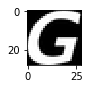

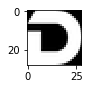

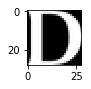

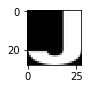

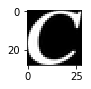

In [9]:
for i in range(5):
    img_mat = (X[np.random.choice(range(len(X)-1))]).reshape(image_size, image_size)
    plt.figure(figsize=(1,1))
    plt.imshow(img_mat, cmap='gray')
    plt.show()

(array([1872., 1873., 1873., 1873., 1873., 1872., 1872., 1872., 1872.,
        1872.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

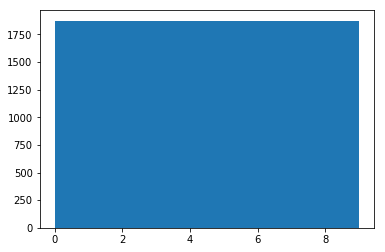

In [10]:
plt.hist(Y)

In [11]:
def data_split(X_full, Y_full, train_size, test_size, valid_size, random_state=42):
    size = train_size + test_size + valid_size
    print('Total size of dataset = %d, train = %d, test = %d, valid = %d' % (size, train_size, test_size, valid_size))
    
    X, y = X_full[:size], Y_full[:size]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(test_size + valid_size) / float(size), random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=float(test_size) / float(test_size + valid_size), random_state=random_state)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [12]:
X_train, y_train, X_val, y_val, X_test, y_test = data_split(X, Y, 200000, 19000, 10000)

Total size of dataset = 229000, train = 200000, test = 19000, valid = 10000


In [13]:
X_train.shape

(16352, 28, 28)

In [14]:
X_test.shape

(1555, 28, 28)

(array([1613., 1616., 1640., 1621., 1649., 1631., 1637., 1648., 1642.,
        1655.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

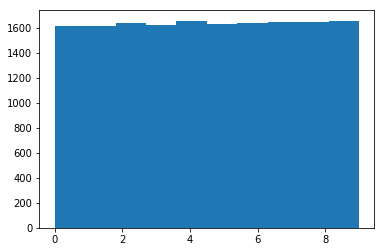

In [15]:
plt.hist(y_train)

(array([167., 166., 159., 163., 146., 162., 147., 148., 157., 140.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

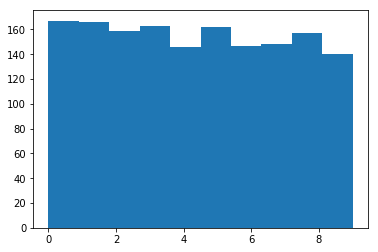

In [16]:
plt.hist(y_test)

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=2, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    keras.layers.Conv2D(filters=4, kernel_size=(3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
X_train = X_train.reshape((len(X_train), image_size, image_size, 1))

In [20]:
X_test = X_test.reshape((len(X_test), image_size, image_size, 1))

In [21]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
16352/16352 [==============================] - 10s 632us/step - loss: 1.4447 - acc: 0.5624
Epoch 2/15
16352/16352 [==============================] - 10s 597us/step - loss: 0.6502 - acc: 0.8216
Epoch 3/15
16352/16352 [==============================] - 11s 668us/step - loss: 0.5212 - acc: 0.8492
Epoch 4/15
16352/16352 [==============================] - 10s 632us/step - loss: 0.4073 - acc: 0.8813
Epoch 5/15
16352/16352 [==============================] - 11s 685us/step - loss: 0.3516 - acc: 0.8973
Epoch 6/15
16352/16352 [==============================] - 12s 724us/step - loss: 0.5109 - acc: 0.8485
Epoch 7/15
16352/16352 [==============================] - 12s 736us/step - loss: 0.4145 - acc: 0.8782
Epoch 8/15
16352/16352 [==============================] - 12s 735us/step - loss: 0.3195 - acc: 0.9046
Epoch 9/15
16352/16352 [==============================] - 11s 696us/step - loss: 0.2706 - acc: 0.9194
Epoch 10/15
16352/16352 [==============================] - 12s 721us/step - loss: 

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

1555/1555 [==============================] - 1s 386us/step
('Test accuracy:', 0.9016077171951244)


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 2)         20        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 4)         76        
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 296,426
Trainable params: 296,426
Non-trainable params: 0
_________________________________________________________________


In [24]:
class NetworkTester:
    def __init__(
            self,
            x=np.array([]),
            y=np.array([]),
            test_percentage=0.3,
            random_state=42,
            epochs=15,
            dataset_size=10e10,
            image_size=28,
            layers=[],
    ):
        self.epochs = epochs
        self.X = x[:dataset_size, :].reshape((len(x[:dataset_size, :]), image_size, image_size, 1))
        self.Y = y[:dataset_size]
        self.random_state = random_state
        self.test_percentage = test_percentage
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.Y,
                                                                                test_size=self.test_percentage,
                                                                                random_state=self.random_state)
        self.image_size = image_size
        self.layers = layers

        start = timer()
        self.debug()
        self.build()

        self.model.summary()

        self.fit(self.X_train, self.y_train)
        self.score(self.X_test, self.y_test)

        end = timer()
        print('----------------------------------------------------------------------------------------')
        print('Execution time: %ds' % (end - start))
        print('----------------------------------------------------------------------------------------')
        print('Accuracy: %.3f' % self.accuracy)

    def debug(self):
        print('----------------------------------------------------------------------------------------')
        print('Initial arguments:')
        print('----------------------------------------------------------------------------------------')
        print('X_train shape =', self.X_train.shape)
        print('X_test shape =', self.X_test.shape)
        print('y_train shape =', self.y_train.shape)
        print('y_test shape =', self.y_test.shape)
        print('Epochs to train = %d' % self.epochs)
        print('----------------------------------------------------------------------------------------')

        plt.title('Train and Test distribution')
        plt.subplot(2, 1, 1)
        plt.xlabel('Output')
        plt.ylabel('N')
        plt.hist(self.y_train, label='Train')
        plt.legend()
        plt.subplot(2, 1, 2)
        plt.xlabel('Output')
        plt.ylabel('N')
        plt.hist(self.y_test, label='Test')
        plt.legend()
        plt.show()
        print('----------------------------------------------------------------------------------------')

    def build(self):
        model = keras.Sequential(self.layers)
        model.compile(optimizer='adamax',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        self.model = model

    def fit(self, x, y):
        history = self.model.fit(x, y, epochs=self.epochs, use_multiprocessing=True)
        print('----------------------------------------------------------------------------------------')
        accs = list(history.history.get('acc'))
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(accs)
        plt.show()

    def score(self, x, y):
        test_loss, test_acc = self.model.evaluate(x, y)
        self.accuracy = test_acc

----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (14979, 28, 28, 1))
('X_test shape =', (3745, 28, 28, 1))
('y_train shape =', (14979,))
('y_test shape =', (3745,))
Epochs to train = 15
----------------------------------------------------------------------------------------


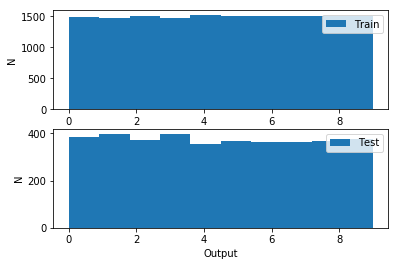

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 2)         20        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 4)         76        
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 296,426
Trainable params: 296,426
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
14979/14979 [=======================

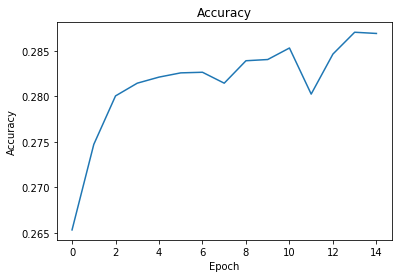

3745/3745 [==============================] - 2s 429us/step
----------------------------------------------------------------------------------------
Execution time: 186s
----------------------------------------------------------------------------------------
Accuracy: 0.281


<__main__.NetworkTester instance at 0x12174a5f0>

In [25]:
NetworkTester(
        x=X,
        y=Y,
        layers=[
            keras.layers.Conv2D(filters=2, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
            keras.layers.Conv2D(filters=4, kernel_size=(3, 3), activation='relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(128, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ],
        dataset_size=250000
)

----------------------------------------------------------------------------------------
Initial arguments:
----------------------------------------------------------------------------------------
('X_train shape =', (14979, 28, 28, 1))
('X_test shape =', (3745, 28, 28, 1))
('y_train shape =', (14979,))
('y_test shape =', (3745,))
Epochs to train = 15
----------------------------------------------------------------------------------------


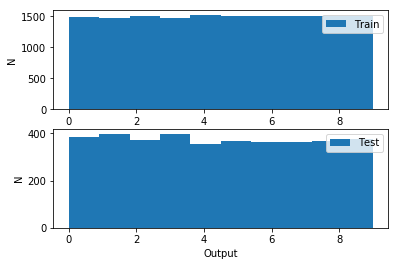

----------------------------------------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 23, 23, 8)         296       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 10)        2890      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3240)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               829696    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 835,452
Trainable params: 835,452
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
14979/14979 [=======================

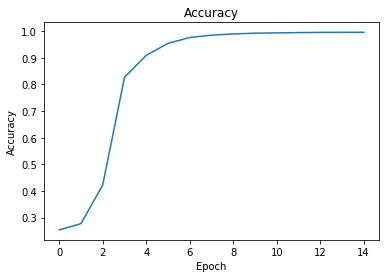

3745/3745 [==============================] - 4s 1ms/step
----------------------------------------------------------------------------------------
Execution time: 635s
----------------------------------------------------------------------------------------
Accuracy: 0.899


<__main__.NetworkTester instance at 0x1216f3200>

In [26]:
NetworkTester(
        x=X,
        y=Y,
        layers=[
            keras.layers.Conv2D(filters=8, kernel_size=(6, 6), activation='relu', input_shape=(image_size, image_size, 1)),
            keras.layers.Conv2D(filters=10, kernel_size=(6, 6), activation='relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(256, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ],
        dataset_size=250000
)

In [ ]:
NetworkTester(
        x=X,
        y=Y,
        layers=[
            keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(image_size * image_size, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ],
        dataset_size=250000
)

In [ ]:
NetworkTester(
        x=X,
        y=Y,
        layers=[
            keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
            keras.layers.AveragePooling2D((2, 2)),
            keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
            keras.layers.AveragePooling2D((2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(image_size * image_size, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ],
        dataset_size=250000
)

In [ ]:
NetworkTester(
        x=X,
        y=Y,
        layers=[
            keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
            keras.layers.AveragePooling2D((2, 2)),
            keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(image_size * image_size, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ],
        dataset_size=250000
)

In [ ]:
NetworkTester(
        x=X,
        y=Y,
        layers=[
            keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
            keras.layers.AveragePooling2D((2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(image_size * image_size, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ],
        dataset_size=250000
)

In [ ]:
NetworkTester(
        x=X,
        y=Y,
        layers=[
            keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(image_size * image_size, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ],
        dataset_size=250000
)

In [ ]:
print('LeNet')

In [ ]:
NetworkTester(
        x=X,
        y=Y,
        layers=[
            keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
            keras.layers.AveragePooling2D(),
            keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
            keras.layers.AveragePooling2D(),
            keras.layers.Flatten(),
            keras.layers.Dense(120, activation=tf.nn.relu),
            keras.layers.Dense(84, activation=tf.nn.relu),
            keras.layers.Dense(10, activation=tf.nn.softmax)
        ],
        dataset_size=250000
)